In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\JoCraft\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
Rectangle1 = union_sample([RectangleDataset(device=device, coords= [(-10.0,0),(-10,10)])]) 

gaussian_path = GaussianConditionalProbabilityPath(p_data=Rectangle1, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="Diffusion", model=model1)

trainer.train_loop(num_epochs=15000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 6.725226402282715
In Epoch 1000 we have a loss of 5.902634620666504
In Epoch 2000 we have a loss of 51.04938888549805
In Epoch 3000 we have a loss of 10.136794090270996
In Epoch 4000 we have a loss of 9.015275001525879
In Epoch 5000 we have a loss of 29.59345245361328
In Epoch 6000 we have a loss of 8.951212882995605
In Epoch 7000 we have a loss of 8.730396270751953
In Epoch 8000 we have a loss of 6.858950614929199
In Epoch 9000 we have a loss of 5.954718112945557
In Epoch 10000 we have a loss of 7.4945549964904785
In Epoch 11000 we have a loss of 6.008281707763672
In Epoch 12000 we have a loss of 18.583723068237305
In Epoch 13000 we have a loss of 7.482268333435059
In Epoch 14000 we have a loss of 15.369438171386719


In [3]:
Rectangle2 = union_sample([RectangleDataset(device=device, coords= [(7,10),(-10,10)]), RectangleDataset(device=device, coords= [(-10,-7),(-10,10)])]) 

gaussian_path2 = GaussianConditionalProbabilityPath(p_data=Rectangle2, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model2 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer2 = FlowDiffTrainer(path=gaussian_path2, modeltype="Diffusion", model=model2)

trainer2.train_loop(num_epochs=15000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 6.0589494705200195
In Epoch 1000 we have a loss of 5.758906841278076
In Epoch 2000 we have a loss of 4.430305480957031
In Epoch 3000 we have a loss of 7.389646530151367
In Epoch 4000 we have a loss of 13.247292518615723
In Epoch 5000 we have a loss of 5.581209182739258
In Epoch 6000 we have a loss of 6.634459018707275
In Epoch 7000 we have a loss of 7.256272792816162
In Epoch 8000 we have a loss of 4.813905239105225
In Epoch 9000 we have a loss of 6.001304626464844
In Epoch 10000 we have a loss of 5.500593185424805
In Epoch 11000 we have a loss of 6.105620384216309
In Epoch 12000 we have a loss of 7.26426887512207
In Epoch 13000 we have a loss of 10.238363265991211
In Epoch 14000 we have a loss of 18.266075134277344


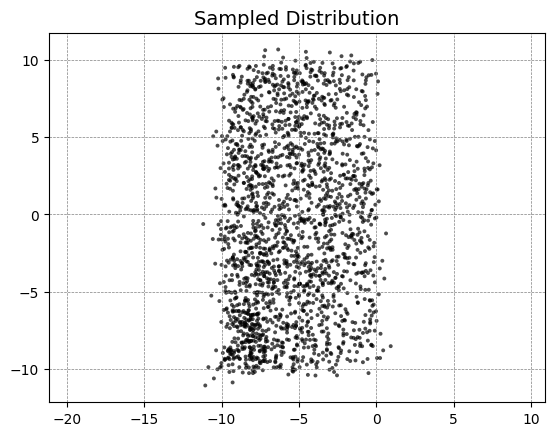

In [4]:
models = [model1]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

samples = comp_sampler.sample_with_traj(gaussian_path.p_init.sample(2000), steps)[-1]

plot_samples(samples)
plt.show()

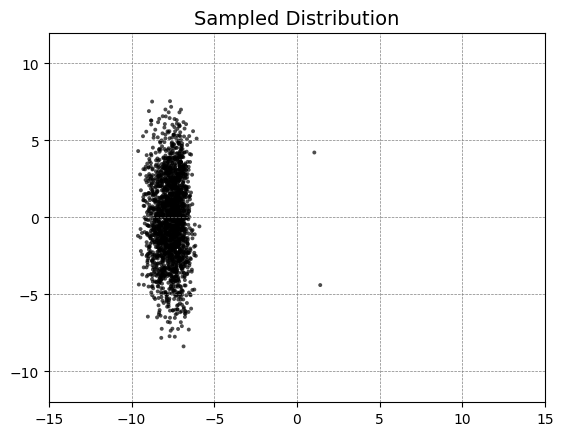

In [5]:
models = [model1,model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

samples = comp_sampler.sample_with_traj(gaussian_path.p_init.sample(2000), steps)[-1]

plot_samples(samples, plot_range=[(-15, 15),(-12, 12)])
plt.show()